In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_3364\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m30_v30_L2_s4=torch.tensor([[[1.0000e+02, 9.7575e+01, 9.8452e+01, 8.6957e+00, 7.5472e-02,
          5.9850e+01],
         [1.0000e+02, 9.9099e+01, 9.5699e+01, 1.0000e+02, 0.0000e+00,
          9.0080e+01],
         [1.0000e+02, 9.8597e+01, 7.1429e+01, 1.0000e+02, 1.3274e+00,
          9.7530e+01],
         [9.9914e+01, 9.9827e+01, 8.9474e+01, 1.0000e+02, 0.0000e+00,
          9.8620e+01],
         [9.9918e+01, 9.2417e+01, 6.2500e+01, 0.0000e+00, 0.0000e+00,
          9.9220e+01],
         [9.9899e+01, 9.2982e+01, 6.6667e+01, 0.0000e+00, 0.0000e+00,
          9.9690e+01],
         [9.9909e+01, 9.2958e+01, 5.0000e+01, 0.0000e+00, 0.0000e+00,
          9.9750e+01],
         [9.9910e+01, 9.6552e+01, 1.0000e+02, 0.0000e+00, 0.0000e+00,
          9.9830e+01],
         [9.9950e+01, 9.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.9910e+01],
         [9.9950e+01, 1.0000e+02, 1.0000e+02, 0.0000e+00, 0.0000e+00,
          9.9940e+01]],

        [[1.0000e+02, 1.0000e+02, 8.5636e+01, 3.9768e+01, 7.3556e-01,
          4.2880e+01],
         [1.0000e+02, 9.7845e+01, 9.0499e+01, 5.2263e+01, 7.9880e-01,
          7.7420e+01],
         [1.0000e+02, 9.7045e+01, 6.8706e+01, 1.7021e+01, 4.2220e+00,
          8.8680e+01],
         [9.9920e+01, 9.5086e+01, 6.4479e+01, 1.7391e+01, 2.0779e+00,
          9.4170e+01],
         [9.9885e+01, 9.2126e+01, 4.5455e+01, 2.8571e+01, 2.6042e+00,
          9.6580e+01],
         [9.9848e+01, 8.8019e+01, 3.5714e+01, 0.0000e+00, 3.6585e+00,
          9.7860e+01],
         [9.9896e+01, 8.5185e+01, 2.6316e+01, 0.0000e+00, 2.9412e+00,
          9.8910e+01],
         [9.9929e+01, 8.0899e+01, 4.2857e+01, 0.0000e+00, 0.0000e+00,
          9.9350e+01],
         [9.9858e+01, 7.9612e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.9570e+01],
         [9.9910e+01, 5.3659e+01, 3.3333e+01, 0.0000e+00, 1.0000e+02,
          9.9690e+01]],

        [[1.0000e+02, 1.0000e+02, 8.9186e+01, 4.1071e+01, 2.3062e+00,
          1.6720e+01],
         [1.0000e+02, 9.5613e+01, 7.0897e+01, 2.8349e+01, 2.5103e+00,
          3.2660e+01],
         [9.9862e+01, 9.2232e+01, 6.3003e+01, 2.1967e+01, 2.2320e+00,
          5.5850e+01],
         [9.8525e+01, 8.5243e+01, 4.7375e+01, 1.4440e+01, 2.6950e+00,
          6.5830e+01],
         [9.8525e+01, 7.9766e+01, 3.1653e+01, 6.8433e+00, 2.6761e+00,
          7.5120e+01],
         [9.8004e+01, 7.1279e+01, 2.7823e+01, 6.4220e+00, 3.0534e+00,
          8.3630e+01],
         [9.8824e+01, 7.3232e+01, 2.4438e+01, 1.5094e+01, 5.0000e+00,
          9.1360e+01],
         [9.9647e+01, 8.0000e+01, 3.5484e+01, 1.2500e+01, 0.0000e+00,
          9.6940e+01],
         [9.9801e+01, 8.0435e+01, 3.8710e+01, 0.0000e+00, 0.0000e+00,
          9.8670e+01],
         [9.9807e+01, 8.7421e+01, 4.2857e+01, 0.0000e+00, 0.0000e+00,
          9.9530e+01]],

        [[1.0000e+02, 1.0000e+02, 9.6732e+01, 4.7461e+01, 3.9337e+00,
          7.7000e+00],
         [1.0000e+02, 9.9029e+01, 8.7657e+01, 3.6037e+01, 2.8631e+00,
          1.2330e+01],
         [1.0000e+02, 8.9901e+01, 5.8628e+01, 2.1948e+01, 3.3745e+00,
          1.9930e+01],
         [9.5851e+01, 7.2222e+01, 3.8525e+01, 1.2915e+01, 3.6731e+00,
          2.8110e+01],
         [9.3337e+01, 6.5842e+01, 2.7473e+01, 9.8625e+00, 3.4884e+00,
          4.1540e+01],
         [9.3328e+01, 5.8992e+01, 2.0976e+01, 8.5828e+00, 3.1524e+00,
          5.7900e+01],
         [9.7123e+01, 6.5124e+01, 2.8715e+01, 1.0983e+01, 4.4944e+00,
          7.9660e+01],
         [9.9067e+01, 8.1164e+01, 4.7382e+01, 2.5373e+01, 0.0000e+00,
          9.3950e+01],
         [9.9341e+01, 9.0421e+01, 5.8824e+01, 5.0000e+01, 0.0000e+00,
          9.8580e+01],
         [9.9808e+01, 9.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.9760e+01]],

        [[0.0000e+00, 0.0000e+00, 1.0000e+02, 6.2626e+01, 3.0950e+00,
          3.8200e+00],
         [0.0000e+00, 1.0000e+02, 8.6111e+01, 4.7764e+01, 2.7781e+00,
          5.6400e+00],
         [0.0000e+00, 9.3103e+01, 5.5849e+01, 1.9484e+01, 2.9713e+00,
          6.4900e+00],
         [8.9744e+01, 7.3432e+01, 3.1284e+01, 1.3266e+01, 3.3615e+00,
          1.0530e+01],
         [7.9032e+01, 5.1375e+01, 2.4292e+01, 8.6249e+00, 3.5490e+00,
          1.6920e+01],
         [7.9965e+01, 4.5195e+01, 2.1420e+01, 8.3564e+00, 4.9460e+00,
          3.2550e+01],
         [9.2520e+01, 6.0817e+01, 2.8860e+01, 1.2605e+01, 4.9383e+00,
          6.6220e+01],
         [9.8691e+01, 8.3823e+01, 5.7979e+01, 2.3810e+01, 2.5000e+01,
          9.4380e+01],
         [9.9703e+01, 9.5982e+01, 8.3333e+01, 0.0000e+00, 0.0000e+00,
          9.9600e+01],
         [9.9980e+01, 1.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.9980e+01]],

        [[0.0000e+00, 0.0000e+00, 1.0000e+02, 8.3333e+01, 3.2715e+00,
          3.5600e+00],
         [0.0000e+00, 0.0000e+00, 1.0000e+02, 4.3307e+01, 3.3350e+00,
          3.9200e+00],
         [0.0000e+00, 1.0000e+02, 4.7368e+01, 2.4211e+01, 3.3441e+00,
          4.2400e+00],
         [0.0000e+00, 5.7143e+01, 4.4928e+01, 1.3290e+01, 2.9927e+00,
          4.8800e+00],
         [1.0000e+02, 4.9275e+01, 2.6534e+01, 1.0480e+01, 3.0581e+00,
          7.0400e+00],
         [6.9106e+01, 4.3636e+01, 2.0218e+01, 8.4710e+00, 3.6135e+00,
          1.4440e+01],
         [7.0152e+01, 4.5806e+01, 2.5616e+01, 1.3448e+01, 7.8125e+00,
          4.3090e+01],
         [9.9052e+01, 9.4488e+01, 7.8378e+01, 0.0000e+00, 0.0000e+00,
          9.8560e+01],
         [1.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+02],
         [1.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+02]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)

m30_v30_L2_s4.size()

torch.Size([6, 10, 6])

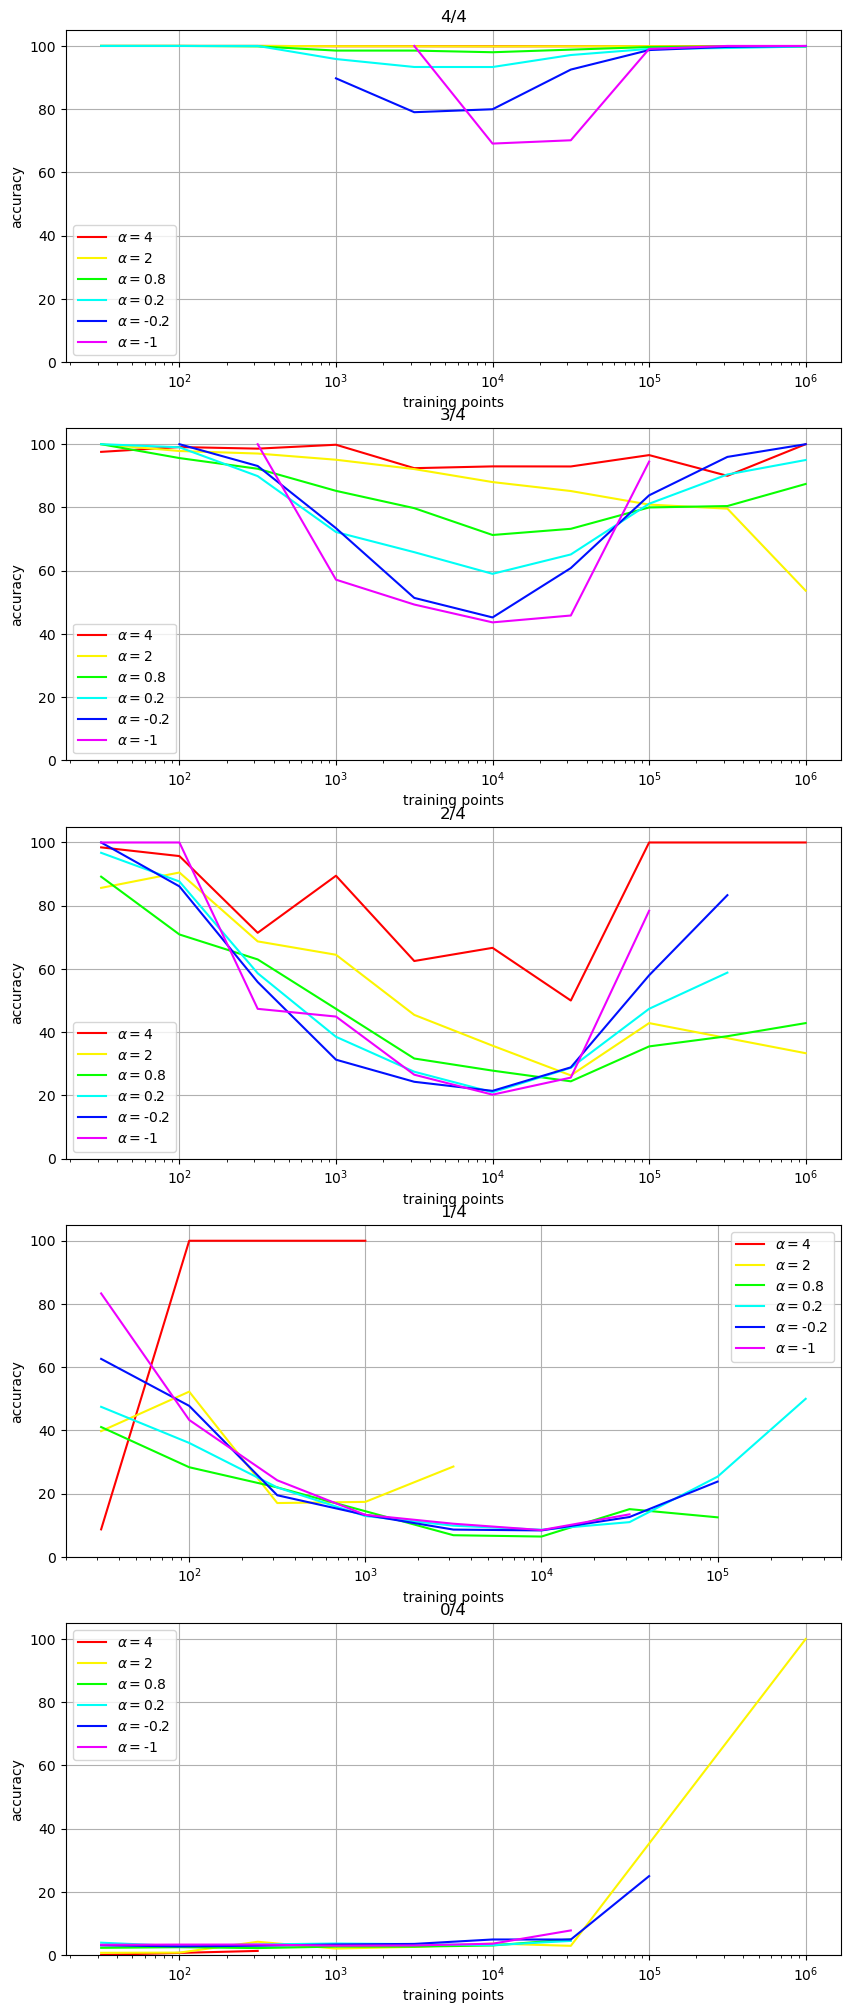

In [3]:
fig, axis = plt.subplots(5, 1, figsize=(10, 25))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4", "3/4", "2/4","1/4","0/4"]
for i in range(5):  #i is how much path you see
    for j in range(6):  #j is how much temperature you see
        data = m30_v30_L2_s4[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=r"$\alpha=$"+f'{temperature_list[j]}')
    axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


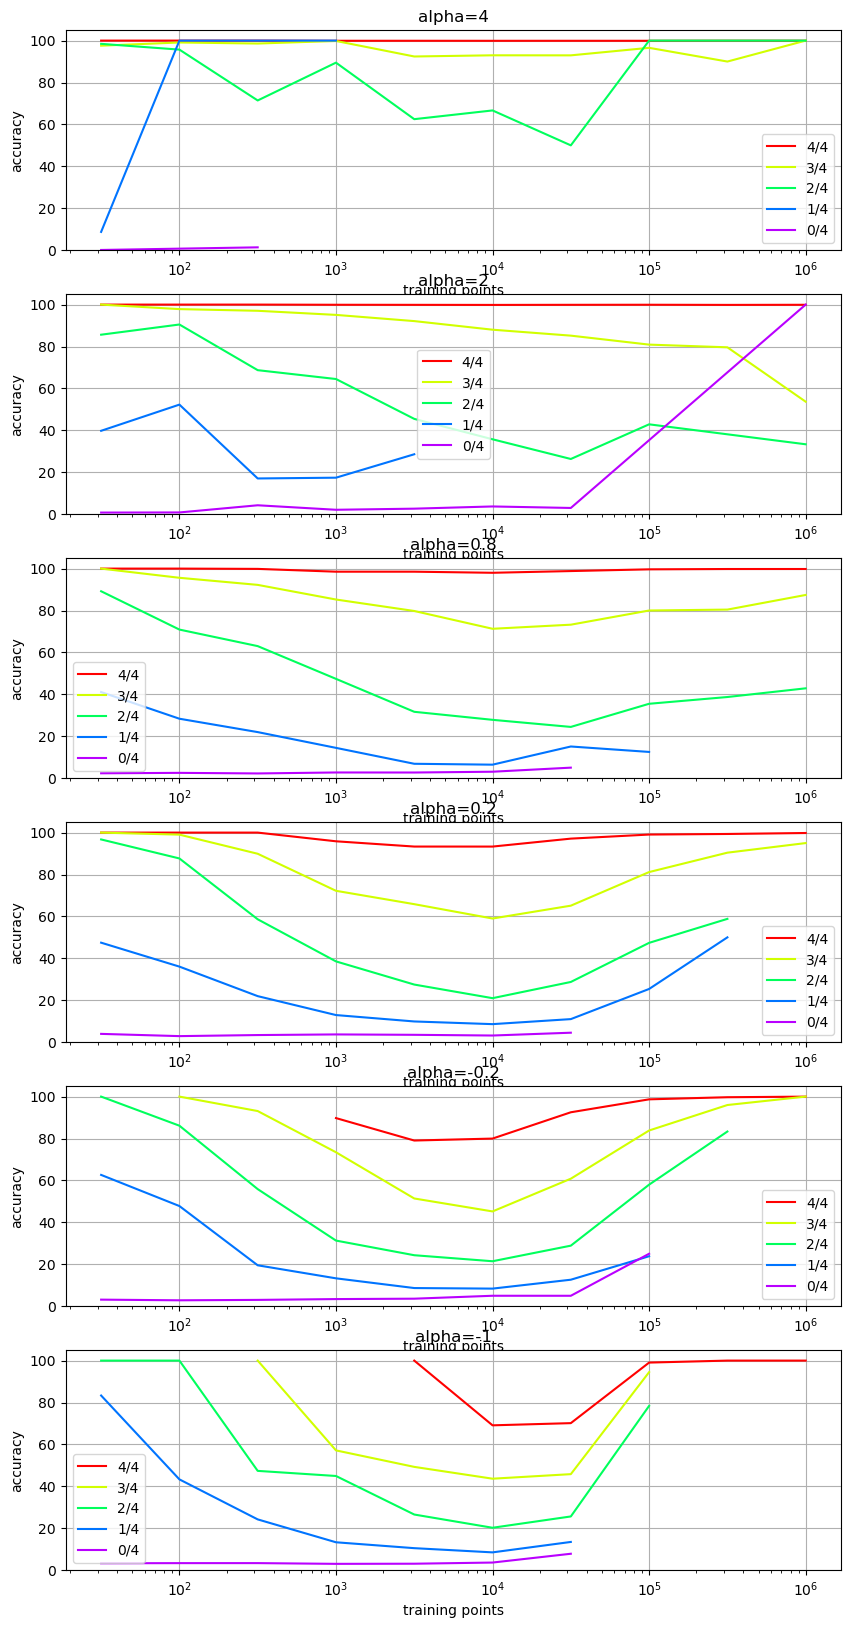

In [4]:
fig, axis = plt.subplots(6, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4", "3/4", "2/4","1/4","0/4"]
for j in range(6):
    for i in range(5):
        data = m30_v30_L2_s4[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i])
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    